# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [54]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [22]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [23]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Extract all rows of data


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [25]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for row in browser.find_by_css('tr'):
    rows.append(row.text.split(' '))

In [26]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_scrape = pd.DataFrame(rows)

In [27]:
# Confirm DataFrame was created successfully
data_scrape.head()

,0,1,2,3,4,5,6
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [28]:
# Examine data type of each column
data_scrape.columns = data_scrape[:1].values[0]
data_scrape.head()

<bound method NDFrame.head of         id  terrestrial_date   sol   ls  month  min_temp  pressure
0       id  terrestrial_date   sol   ls  month  min_temp  pressure
1        2        2012-08-16    10  155      6     -75.0     739.0
2       13        2012-08-17    11  156      6     -76.0     740.0
3       24        2012-08-18    12  156      6     -76.0     741.0
4       35        2012-08-19    13  157      6     -74.0     732.0
...    ...               ...   ...  ...    ...       ...       ...
1863  1889        2018-02-23  1973  133      5     -78.0     730.0
1864  1892        2018-02-24  1974  134      5     -77.0     729.0
1865  1894        2018-02-25  1975  134      5     -76.0     729.0
1866  1893        2018-02-26  1976  135      5     -77.0     728.0
1867  1895        2018-02-27  1977  135      5     -77.0     727.0

[1868 rows x 7 columns]>

In [29]:
# Change data types for data analysis
# Begin by removing first row & start the index at 0
data_scrape = data_scrape.drop([0])
data_scrape = data_scrape.reset_index()
data_scrape.head()
# Convert data types to appropriate types for analysis
data_scrape['terrestrial_date'] = pd.to_datetime(data_scrape['terrestrial_date'])
data_scrape[['id', 'sol', 'ls', 'month']] = data_scrape[['id', 'sol', 'ls', 'month']].astype(int)
data_scrape[['min_temp', 'pressure']]= data_scrape[['min_temp', 'pressure']].astype(float)


In [35]:
# Confirm type changes were successful by examining data types again
data_scrape.head()

,index,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1,2,2012-08-16,10,155,6,-75.0,739.0
1,2,13,2012-08-17,11,156,6,-76.0,740.0
2,3,24,2012-08-18,12,156,6,-76.0,741.0
3,4,35,2012-08-19,13,157,6,-74.0,732.0
4,5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [31]:
# 1. How many months exist on Mars?
data_scrape.dtypes
data_scrape['month'].unique()
print('Twelve months exist on Mars.')

Twelve months exist on Mars.


In [37]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
data_scrape['sol'].count()
print('1867 Martian days exist in the dataset.')

1867 Martian days exist in the dataset.


In [44]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# First group by month 
data_scrape_by_month = data_scrape.groupby(['month'])
# Find the average temp per month
avg_temp = data_scrape_by_month["min_temp"].mean()
# Display results
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

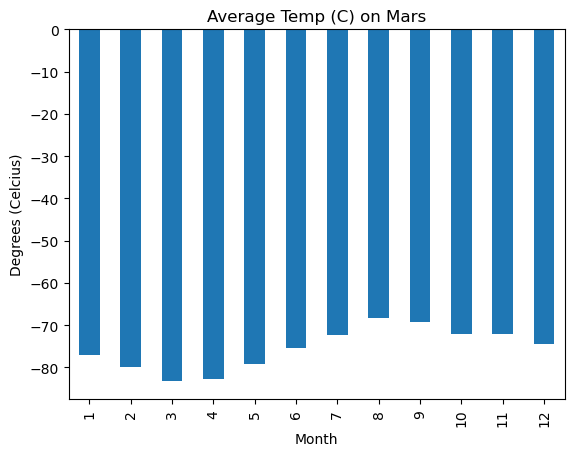

In [45]:
# Plot the average temperature by month
avg_temp.plot(kind="bar")
plt.ylabel("Degrees (Celcius)")
plt.xlabel("Month")
plt.title("Average Temp (C) on Mars")
plt.show()

In [49]:
# Identify the coldest and hottest months in Curiosity's location
print('Months 3 had the coldest average temperature on Mars and Month 8 had the warmest average temperature.')

Months 3 had the coldest average temperature on Mars and Month 8 had the warmest average temperature.


In [47]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# Find the average atmospheric pressure per month
avg_atmpress = data_scrape_by_month["pressure"].mean()
# Display results
avg_atmpress

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

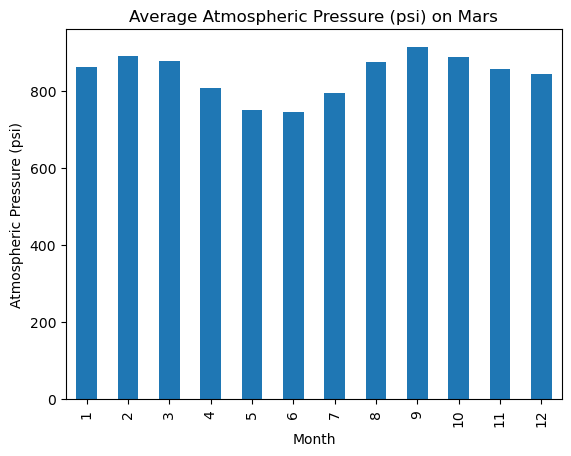

In [48]:
# Plot the average pressure by month
avg_atmpress.plot(kind="bar")
plt.ylabel("Atmospheric Pressure (psi)")
plt.xlabel("Month")
plt.title("Average Atmospheric Pressure (psi) on Mars")
plt.show()

In [50]:
# Identify months with highest and lowest average atmospheric pressure
print('Month 6 had the lowest average atmospheric pressure on Mars, while Month 9 had the highest average atmospheric pressure.')

Month 6 had the lowest average atmospheric pressure on Mars, while Month 9 had the highest average atmospheric pressure.


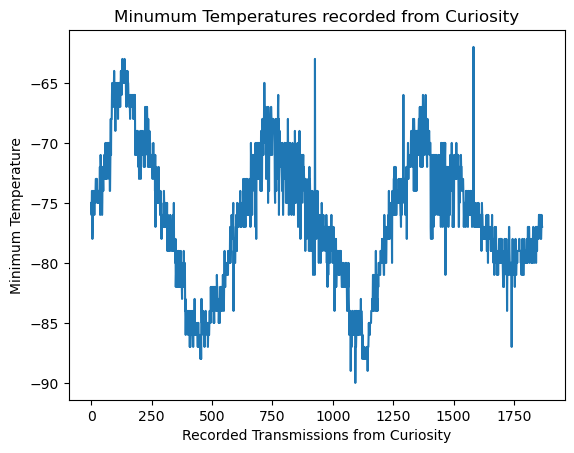

Using the visualization of minimum temperatures recorded each terrestrial day along with the assumption that temperatures are expected to be highest when Mars is at its point closest to the sun in its rotation, we can assume that a Mars year could be estimates by subtracting the number of days between two of these peak temperatures. If we estimate that one peak it at approximately 700 days and another is at approximately 1375, then we can subsequently reason that there are 675 days between these two peaks and that there could be near this many days in a Mars year.


In [53]:
# 5. About how many terrestrial (Earth) days exist in a Martian year?
data_scrape["min_temp"].plot()
plt.ylabel("Minimum Temperature")
plt.xlabel("Recorded Transmissions from Curiosity")
plt.title("Minumum Temperatures recorded from Curiosity")
plt.show()
print('Using the visualization of minimum temperatures recorded each terrestrial day along with the assumption that temperatures are expected to be highest when Mars is at its point closest to the sun in its rotation, we can assume that a Mars year could be estimates by subtracting the number of days between two of these peak temperatures. If we estimate that one peak it at approximately 700 days and another is at approximately 1375, then we can subsequently reason that there are 675 days between these two peaks and that there could be near this many days in a Mars year.')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [55]:
# Write the data to a CSV
os.makedirs("output", exist_ok=True)
data_scrape.to_csv("output/data_scrape.csv", index=False)

In [21]:
browser.quit()